In [1]:
from data_handler import DataUtils
from sklearn.model_selection import train_test_split
import keras
from keras import layers
from keras import ops
import matplotlib.pyplot as plt

DATASET_PATH = "data.json"
data_util = DataUtils(DATASET_PATH)
# load data
inputs, targets = data_util._get_inputs_and_targets()
    
# split data into train and test sets
inputs_train, inputs_test, targets_train, targets_test = train_test_split(
     inputs, targets, test_size=0.1
)


    

In [2]:
# print(inputs.shape[0]) # 4993
# print(len(inputs)) # 4993
# print(inputs.shape[1]) # 259
# print(inputs.shape[2]) # 13
# print(inputs[1]) # 259
# print(inputs[2]) # 13
# print(inputs.shape) # shape (4993, 259, 13)
    
    
## build the network architecture
model = keras.Sequential([
    # Input Layer
    keras.Input(shape=(inputs.shape[1], inputs.shape[2])),  # (259, 13), where "13" here is MFCC's coefficient
    layers.Flatten(),  # This will flatten the (259, 13) shape to 3367
    

    # # 1st Hidden Layer
    # layers.Dense(1024, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)), # Rectified Linear Unit
    # layers.Dropout(0.3),
    
    # 2nd Hidden Layer
    layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)), # Rectified Linear Unit
    layers.Dropout(0.3),
    # layers.BatchNormalization(),
    
    # 3rd Hidden Layer
    layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)), # Rectified Linear Unit
    layers.Dropout(0.3),
    # layers.BatchNormalization(),
    
    # 4th Hidden Layer
    layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)), # Rectified Linear Unit
    layers.Dropout(0.3),
    # layers.BatchNormalization(),
    
    # Output Layer
    layers.Dense(10, activation="softmax"),
])

# """
# Explanation:
# - The output layer has 10 neurons, each representing one of the 10 possible genres.
# - The activation function used is "softmax" because:
#     - Softmax produces a probability distribution over the 10 genres.
#      - The probabilities across all neurons sum to 1, ensuring that only a single genre is predicted as the most likely (the "winner").
# - This is ideal for multi-class classification tasks where only one class (genre) should be selected.

# Why not use sigmoid here?
# - Sigmoid activation treats each output neuron independently, meaning:
#     - Each neuron outputs a value between 0 and 1, representing the probability of that genre.
#     - Probabilities across neurons do not sum to 1, allowing multiple genres to be predicted simultaneously.
# - This behavior is suitable for multi-label classification (e.g., predicting multiple genres for a single track) but not for single-label classification where only one genre is expected.
# """

In [3]:

# Compile Network  
# Remember " No Free Lunch Theorem (NFL) "
# Trial and Error
# Test which is the best optimizer
# " -- but end of the day this is just a hyperparameter decision"
learning_rate = 0.0001
optimizers = {
    'SGD': keras.optimizers.SGD(learning_rate=learning_rate),
    'Adam': keras.optimizers.Adam(learning_rate=learning_rate),
    'RMSprop': keras.optimizers.RMSprop(learning_rate=learning_rate),
    'Adagrad': keras.optimizers.Adagrad(learning_rate=learning_rate),
    'Adadelta' : keras.optimizers.Adadelta(learning_rate=learning_rate),
    'Adamax' : keras.optimizers.Adamax(learning_rate=learning_rate),
    'Nadam' : keras.optimizers.Nadam(learning_rate=learning_rate)
}   
# """
#     binary_crossentropy: Used for binary classification or multi-label classification where each output is independent, with a sigmoid activation function.
#     sparse_categorical_crossentropy: Used for multi-class problems when labels are integer-encoded rather than one-hot encoded.
# """
# https://stackoverflow.com/questions/45799474/keras-model-evaluate-vs-model-predict-accuracy-difference-in-multi-class-nlp-ta/45834857#45834857
# https://stackoverflow.com/questions/42081257/why-binary-crossentropy-and-categorical-crossentropy-give-different-performances
model_histories = []
for name, opt in optimizers.items():
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
    history = model.fit(inputs_train, targets_train, validation_data=(inputs_test, targets_test), epochs=100, batch_size=32)
    model_histories.append({name : history})
    # print("--" * 100)

Epoch 1/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 32.6432 - sparse_categorical_accuracy: 0.1251 - val_loss: 3.5236 - val_sparse_categorical_accuracy: 0.0871
Epoch 2/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.7100 - sparse_categorical_accuracy: 0.1073 - val_loss: 3.5096 - val_sparse_categorical_accuracy: 0.0901
Epoch 3/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.4050 - sparse_categorical_accuracy: 0.1123 - val_loss: 3.5080 - val_sparse_categorical_accuracy: 0.0871
Epoch 4/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.0004 - sparse_categorical_accuracy: 0.1100 - val_loss: 3.5085 - val_sparse_categorical_accuracy: 0.0871
Epoch 5/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8824 - sparse_categorical_accuracy: 0.1099 - val_loss: 3.5083 - val_sparse_categorical_accuracy: 0.0871
Epoch 6/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.7570 - sparse_categorical_accuracy: 0.1082 - val_loss: 3.5084 - val_sparse_categorical_accuracy: 0.08

Model: SGD
Training Loss: 3.455148935317993
Validation Loss: 3.431800365447998
Training Accuracy: 0.13608545064926147
Validation Accuracy: 0.12812812626361847
SGD final loss: 3.455148935317993, validation accuracy: 0.12812812626361847
--------------------------------------------------


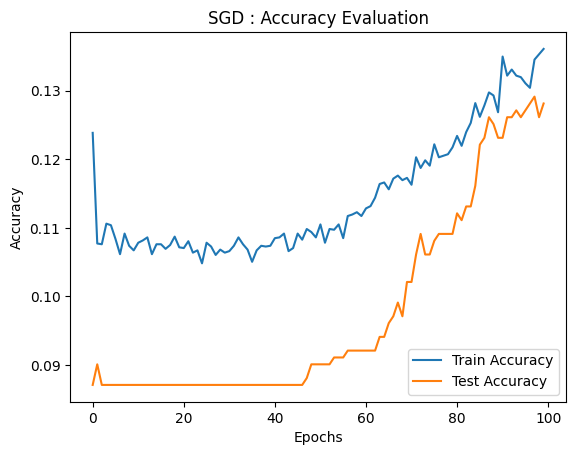

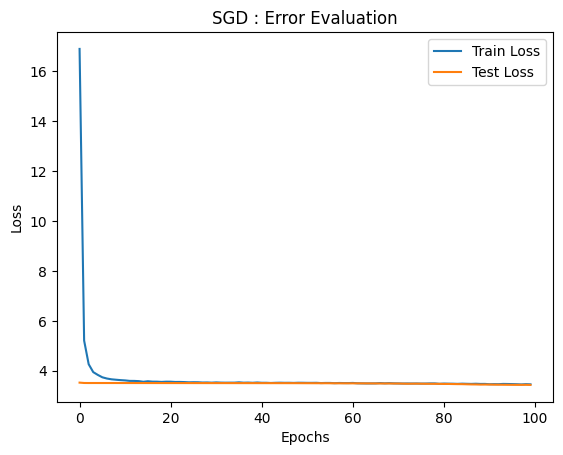

Model: Adam
Training Loss: 0.7334355711936951
Validation Loss: 1.3867213726043701
Training Accuracy: 0.808834969997406
Validation Accuracy: 0.6406406164169312
Adam final loss: 0.7334355711936951, validation accuracy: 0.6406406164169312
--------------------------------------------------


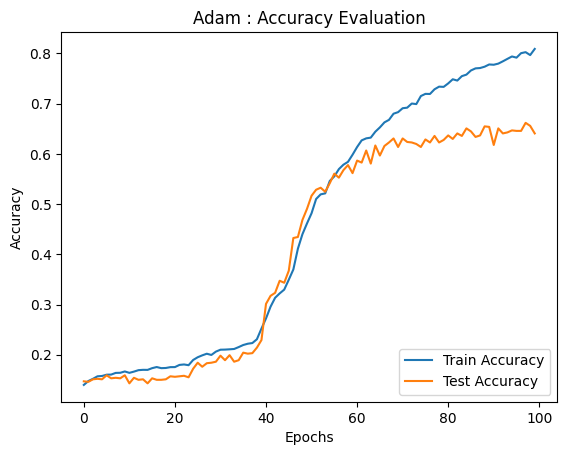

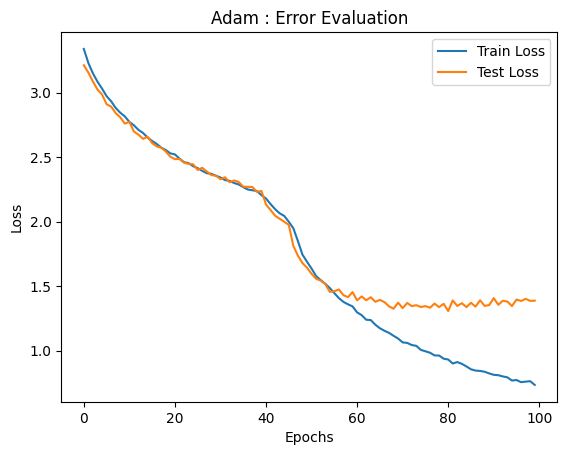

Model: RMSprop
Training Loss: 0.45367515087127686
Validation Loss: 1.8246766328811646
Training Accuracy: 0.9017469882965088
Validation Accuracy: 0.6286286115646362
RMSprop final loss: 0.45367515087127686, validation accuracy: 0.6286286115646362
--------------------------------------------------


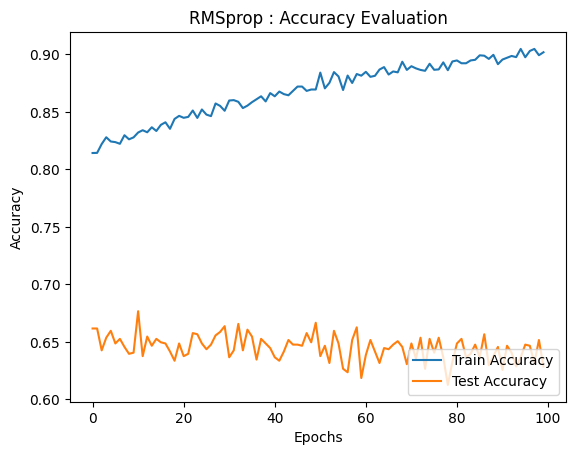

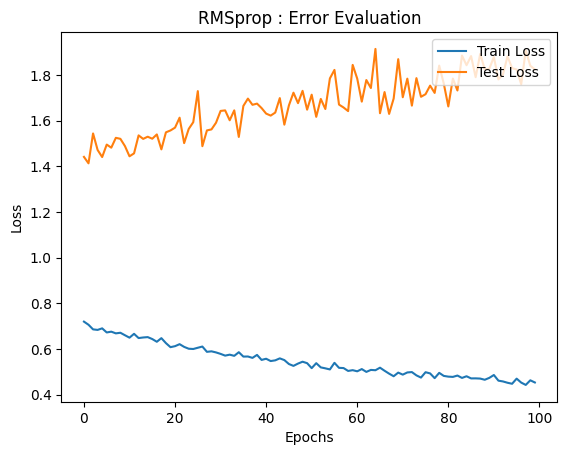

Model: Adagrad
Training Loss: 0.27637338638305664
Validation Loss: 1.8330847024917603
Training Accuracy: 0.9560475945472717
Validation Accuracy: 0.6526526808738708
Adagrad final loss: 0.27637338638305664, validation accuracy: 0.6526526808738708
--------------------------------------------------


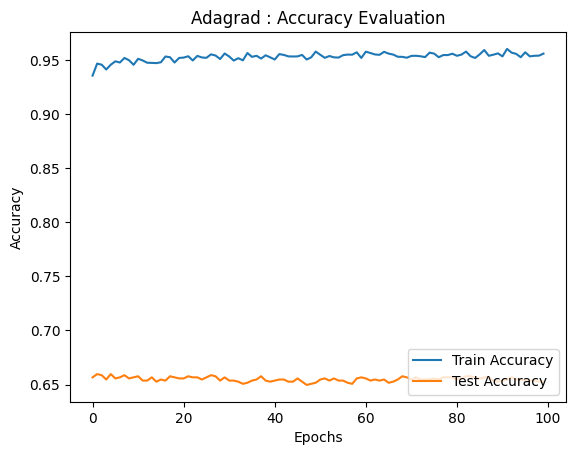

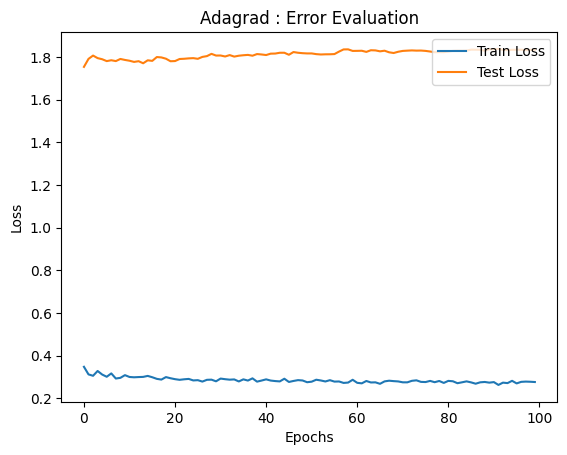

Model: Adadelta
Training Loss: 0.2690548002719879
Validation Loss: 1.874418020248413
Training Accuracy: 0.9563814401626587
Validation Accuracy: 0.6556556820869446
Adadelta final loss: 0.2690548002719879, validation accuracy: 0.6556556820869446
--------------------------------------------------


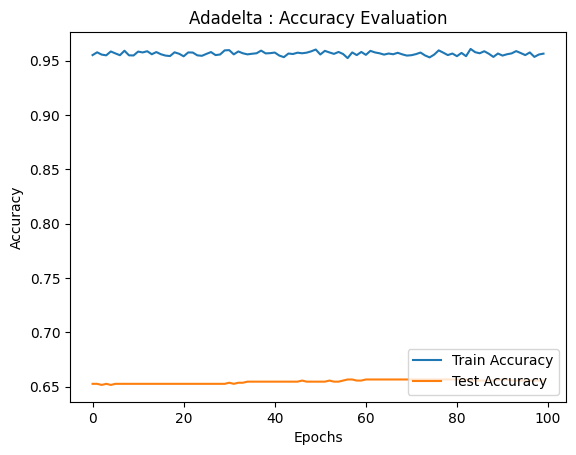

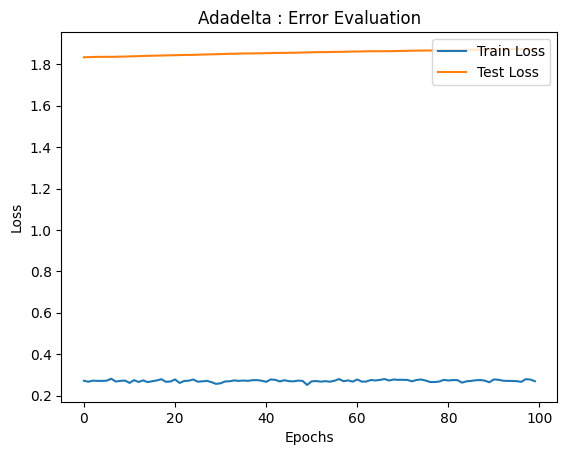

Model: Adamax
Training Loss: 0.22574828565120697
Validation Loss: 1.956641674041748
Training Accuracy: 0.9701791405677795
Validation Accuracy: 0.6566566824913025
Adamax final loss: 0.22574828565120697, validation accuracy: 0.6566566824913025
--------------------------------------------------


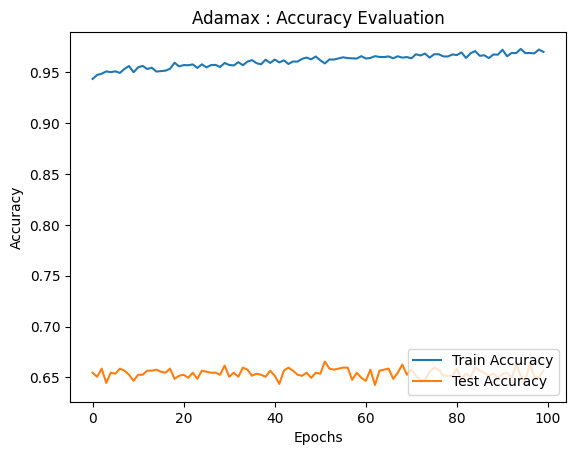

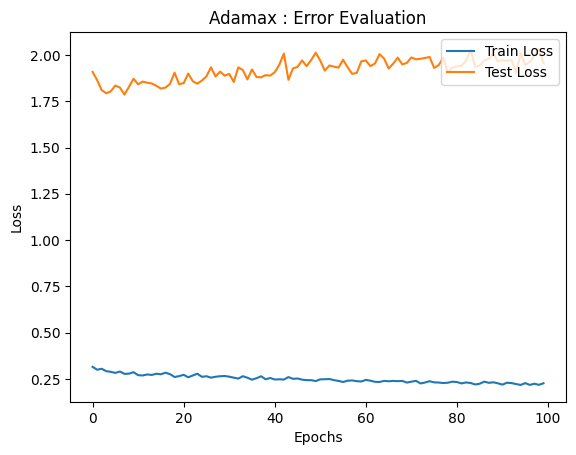

Model: Nadam
Training Loss: 0.35536062717437744
Validation Loss: 1.7447681427001953
Training Accuracy: 0.9416935443878174
Validation Accuracy: 0.6646646857261658
Nadam final loss: 0.35536062717437744, validation accuracy: 0.6646646857261658
--------------------------------------------------


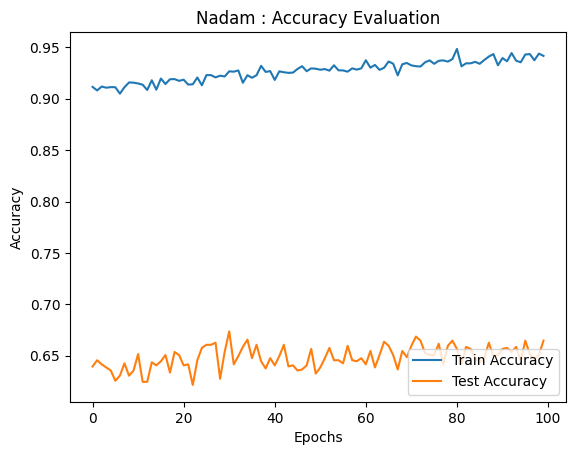

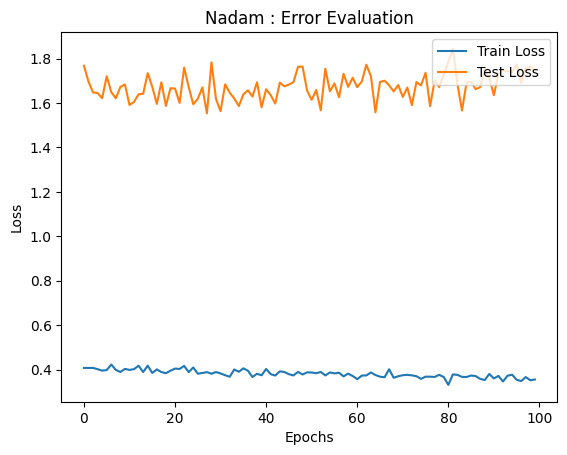

In [8]:
# print(model_histories)
# Iterating over the model_histories to print the results
for model_history in model_histories:
    for name, history in model_history.items():
        print(f"Model: {name}")
        
        # Accessing the history (loss and accuracy values)
        print(f"Training Loss: {history.history['loss'][-1]}")
        print(f"Validation Loss: {history.history['val_loss'][-1]}")
        print(f"Training Accuracy: {history.history['sparse_categorical_accuracy'][-1]}")
        print(f"Validation Accuracy: {history.history['val_sparse_categorical_accuracy'][-1]}")
        print(f"{name} final loss: {history.history['loss'][-1]}, validation accuracy: {history.history['val_sparse_categorical_accuracy'][-1]}")
        print("-" * 50)  # Just to separate the outputs for each optimizer  

        # Access loss and accuracy
        # print(history.history.keys())  # Shows available metrics like 'loss', 'accuracy', etc.

        # Plotting training and validation loss
        
        plt.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_sparse_categorical_accuracy'], label='Test Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend(loc="lower right")
        plt.title(name + ' : Accuracy Evaluation')
        plt.show()
        
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Test Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend(loc="upper right")
        plt.title(name + ' : Error Evaluation')
        plt.show()


In [10]:
def identify_best_optimizer(model_histories):
    best_optimizer = None
    best_val_test_accuracy = -1  # Start with a low value for proper comparison
    
    # Iterate over the model histories
    for model_history in model_histories:
        for name, history in model_history.items():
            training_accuracy = history.history['sparse_categorical_accuracy'][-1]
            test_accuracy = history.history['val_sparse_categorical_accuracy'][-1]
            
            # Track only the optimizer with the highest test accuracy
            if test_accuracy > best_val_test_accuracy:
                best_val_test_accuracy = test_accuracy
                best_optimizer = name
                best_val_training_accuracy = training_accuracy  # Store corresponding training accuracy
    
    return best_optimizer, best_val_training_accuracy, best_val_test_accuracy

best_optimizer, best_val_training_accuracy, best_val_test_accuracy = identify_best_optimizer(model_histories)
print("The best optimizer is: ", best_optimizer)
print("With: \nTraining Accuracy: ", best_val_training_accuracy)
print("Test Accuracy: ", best_val_test_accuracy)


The best optimizer is:  Nadam
With: 
Training Accuracy:  0.9416935443878174
Test Accuracy:  0.6646646857261658
